### Business Problem
Our basic aim is to predict customer churn for a certain bank i.e. which customer is going to leave this bank service. Dataset is small(for learning purpose) and contains 10000 rows with 14 columns. 


## Churn classification using Keras

In [1]:
import sys
sys.version

'3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [3]:
import keras
from keras.models import Sequential
from keras import activations, initializers, regularizers, constraints
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [4]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA13\ANN")

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
# import pandas_profiling
# pandas_profiling.ProfileReport(dataset)

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
dataset.shape

(10000, 11)

In [10]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset_new = pd.get_dummies(dataset, ['Geography', 'Gender'], drop_first=True)
dataset_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
dataset_new.shape

(10000, 12)

In [13]:
dataset_new.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [14]:
# X = dataset_new[dataset_new.columns.difference(['Exited'])]
X = dataset_new.drop(columns=["Exited"])

In [15]:
y = dataset_new['Exited']

In [16]:
dataset_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
# !pip install -U scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# train_test_split?

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state =123)

In [21]:
#Scaling variables - Helps to converge quickly
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [22]:
train_X.shape

(7000, 11)

In [23]:
test_X.shape

(3000, 11)

In [24]:
from keras.models import Sequential
from keras import activations, initializers, regularizers, constraints
from keras.layers import Dense, Activation

In [25]:
model = Sequential()

In [26]:
X.shape

(10000, 11)

In [27]:
#NEtwork = [11, 6, 6 ,1]

# model.add(Dense(units=11,kernel_initializer="uniform", activation="relu", input_dim=11 ))

# model.add(Dense(units=8,kernel_initializer="uniform", activation="relu" ))  # Hidden
# model.add(Dense(units=4,kernel_initializer="uniform", activation="relu" ))  # Hidden 
# model.add(Dense(units=2,kernel_initializer="uniform", activation="relu" ))  # Hidden

# model.add(Dense(units=1,kernel_initializer="uniform", activation="sigmoid" ))  # Output 


In [29]:
# model.summary()

In [30]:
model.add(Dense(units = 6, kernel_initializer="uniform", activation = 'relu', input_dim = 11))
model.add(Dense(units = 4, kernel_initializer="uniform", activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer="uniform", activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
hist=model.fit(train_X, train_y, batch_size = 10, epochs = 20) 

Epoch 1/20
7000/7000 [==============================] - 2s 260us/step - loss: 0.4079 - accuracy: 0.8336
Epoch 2/20
7000/7000 [==============================] - 2s 257us/step - loss: 0.4077 - accuracy: 0.8329
Epoch 3/20
7000/7000 [==============================] - 2s 250us/step - loss: 0.4073 - accuracy: 0.8354
Epoch 4/20
7000/7000 [==============================] - 2s 230us/step - loss: 0.4074 - accuracy: 0.8360
Epoch 5/20
7000/7000 [==============================] - 2s 237us/step - loss: 0.4067 - accuracy: 0.8341
Epoch 6/20
7000/7000 [==============================] - 2s 238us/step - loss: 0.4072 - accuracy: 0.8346
Epoch 7/20
7000/7000 [==============================] - 2s 241us/step - loss: 0.4068 - accuracy: 0.8347
Epoch 8/20
7000/7000 [==============================] - 2s 233us/step - loss: 0.4063 - accuracy: 0.8333
Epoch 9/20
7000/7000 [==============================] - 2s 242us/step - loss: 0.4064 - accuracy: 0.83430s -
Epoch 10/20
7000/7000 [==============================] - 2s 

In [35]:
hist.history["accuracy"]

[0.83357143,
 0.83285713,
 0.8354286,
 0.836,
 0.83414286,
 0.8345714,
 0.8347143,
 0.8332857,
 0.83428574,
 0.83614284,
 0.836,
 0.8354286,
 0.83442855,
 0.8354286,
 0.83514285,
 0.83514285,
 0.8347143,
 0.8332857,
 0.8347143,
 0.83485717]

In [36]:
hist.history["loss"]

[0.40787514906908784,
 0.4076906504375594,
 0.40733977885118555,
 0.4073923649106707,
 0.4067381211050919,
 0.4071616306900978,
 0.4068170320455517,
 0.40630427411624365,
 0.4063663508530174,
 0.4062365090527705,
 0.40608356119266575,
 0.4058309093437025,
 0.4059839151533587,
 0.4053653348343713,
 0.40543865059103285,
 0.4054403629792588,
 0.40508166678249835,
 0.40524316121424947,
 0.40494902771498476,
 0.405081863413964]

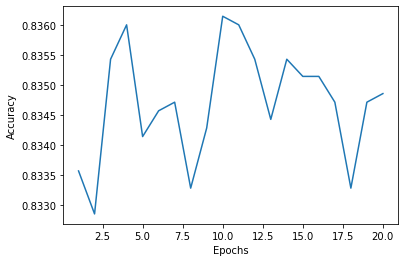

In [40]:
plt.plot(range(1,21), hist.history["accuracy"])
# plt.plot(range(1,21), hist.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [41]:
y_pred = model.predict(test_X)  # Probability

In [53]:
import sklearn.metrics as metrics

In [54]:
metrics.roc_auc_score(test_y, y_pred)

0.7988302075605169

In [59]:
y_pred1 = np.where(y_pred>0.4,1,0)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)

In [61]:
cm

array([[2214,  181],
       [ 332,  273]], dtype=int64)

In [62]:
from sklearn import metrics
print(metrics.classification_report(test_y, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2395
           1       0.60      0.45      0.52       605

    accuracy                           0.83      3000
   macro avg       0.74      0.69      0.71      3000
weighted avg       0.82      0.83      0.82      3000



In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model1 = load_model('model.h5')

In [ ]:
model1.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Churn Classification using pytorch

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
#import pandas_profiling
#pandas_profiling.ProfileReport(dataset)

In [ ]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
dataset_new = pd.get_dummies(dataset, ['Geography', 'Gender'], drop_first=True)

In [ ]:
X = dataset_new[dataset_new.columns.difference(['Exited'])]

In [ ]:
y = dataset_new['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =123)

In [ ]:
#Scaling variables - Helps to converge quickly

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim

In [ ]:
# Numpy to Tensor Conversion (Train Set)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train.values).view(-1,1)

# Numpy to Tensor Conversion (Train Set)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test.values).view(-1,1)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim = 11, output_dim = 1):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 6) #Hidden Layer 1
        self.fc2 = nn.Linear(6, 6)         #Hidden Layer2
        self.output_layer = nn.Linear(6,output_dim) #Output Layer

    
    # Feed Forward Function
    def forward(self, x):
        x = F.relu(self.fc1(x))    # Add ReLU activation function to each layer
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.output_layer(x))
        return x     # Return the created model


In [ ]:
# Hyper-parameters
input_size = 11
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Create the Neural Network Model
model = ANN(input_dim = input_size, output_dim = output_size)
# Print its architecture
print(model)

In [ ]:
#Loss & Optimizer
criterion = nn.BCELoss()   # specify loss function - BCELoss: Binary Cross Entropy loss
#optimizer = optim.SGD(model.parameters(), lr=learning_rate) # specify optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#Before model building, calculate the test loss for verfication
model.eval()     #not updating the model weights
data_test = Variable(X_test).float()
target_test = Variable(y_test).type(torch.FloatTensor)
y_pred_test = model(data_test)
before_train = criterion(y_pred_test.squeeze(), target_test) 
print('Test loss before training' , before_train.item())

In [ ]:
# Train the model
model.train()
for epoch in range(num_epochs):
    data = Variable(X_train).float()
    target = Variable(y_train).type(torch.FloatTensor)
    
    # Forward pass
    outputs = model(data)
    loss = criterion(outputs, target)
    
    # Backward and optimize
    optimizer.zero_grad()   #sets the gradients to zero before we start backpropagation. This is a necessary step as PyTorch accumulates the gradients from the backward passes from the previous epochs.
    loss.backward() #we perform backward pass to computes the gradients.
    optimizer.step() #updates the weights accordingly.
    
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
### Accuracy metrics for train data

In [ ]:
model.eval()              #not updating the model weights
data = Variable(X_train).float()
target = Variable(y_train).type(torch.FloatTensor)
y_pred = model(data)


In [ ]:
y_pred

In [ ]:
#Accuarcy Metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

metrics.roc_auc_score(y_train, y_pred.squeeze().detach().numpy())

In [ ]:
y_train.squeeze().detach().numpy()

In [ ]:
import numpy as np
np.mean(y_train.squeeze().detach().numpy())

In [ ]:
y_pred_cat = (y_pred.squeeze().detach().numpy() > 0.2)
y_pred_cat

In [ ]:
cm = confusion_matrix(y_train, y_pred_cat)
print(cm)

In [ ]:
print(metrics.classification_report(y_train, y_pred_cat))

In [ ]:
### Accuracy metrics for test data

In [ ]:
model.eval()     #not updating the model weights
data_test = Variable(X_test).float()
target_test = Variable(y_test).type(torch.FloatTensor)
y_pred_test = model(data_test)
after_train = criterion(y_pred_test.squeeze(), target_test) 
print('Test loss after Training' , after_train.item())

In [ ]:
metrics.roc_auc_score(y_test, y_pred_test.squeeze().detach().numpy())

In [ ]:
y_pred_test_cat = (y_pred_test.squeeze().detach().numpy() > 0.2)

cm = confusion_matrix(y_test, y_pred_test_cat)
print(cm)
print(metrics.classification_report(y_test, y_pred_test_cat))

In order to improve the model, you can try out different parameter values for your hyperparameters(ie. hidden dimension size, epoch size, learning rates). You can also try changing the structure of your model (ie. adding more hidden layers) to see if your mode improves

## Churn classification using pytorch and batch processing

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
#import pandas_profiling
#pandas_profiling.ProfileReport(dataset)

In [ ]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
dataset_new = pd.get_dummies(dataset, ['Geography', 'Gender'], drop_first=True)

In [ ]:
X = dataset_new[dataset_new.columns.difference(['Exited'])]

In [ ]:
y = dataset_new['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =123)

In [ ]:
#Scaling variables - Helps to converge quickly

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim

In [ ]:
# Numpy to Tensor Conversion (Train Set)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train.values).view(-1,1)

# Numpy to Tensor Conversion (Train Set)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test.values).view(-1,1)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# Make torch datasets from train and test sets
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)

In [ ]:
# Create train and test data loaders for batch processing
train_loader = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim = 11, output_dim = 1):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 6) #Hidden Layer 1
        self.fc2 = nn.Linear(6, 6)         #Hidden Layer2
        self.output_layer = nn.Linear(6,1) #Output Layer

    
    # Feed Forward Function
    def forward(self, x):
        x = F.relu(self.fc1(x))    # Add ReLU activation function to each layer
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.output_layer(x))
        return x     # Return the created model


In [ ]:
# Hyper-parameters
input_size = 11
output_size = 1
num_epochs = 20
learning_rate = 0.01

In [ ]:
# Create the Neural Network Model
model = ANN(input_dim = input_size, output_dim = output_size)
# Print its architecture
print(model)

In [ ]:
#Loss & Optimizer
criterion = nn.BCELoss()   # specify loss function
#optimizer = optim.SGD(model.parameters(), lr=learning_rate) # specify optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#Before model building, calculate the test loss for verfication
model.eval()     #not updating the model weights
data_test = Variable(X_test).float()
target_test = Variable(y_test).type(torch.FloatTensor)
y_pred_test = model(data_test)
before_train = criterion(y_pred_test.squeeze(), target_test) 
print('Test loss before training' , before_train.item())

In [ ]:
# Train the model
model.train()
epoch_list = []
train_loss_list = []

for epoch in range(num_epochs):
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    
    for data,target in train_loader:
        data = Variable(data).float()
        target = Variable(target).type(torch.FloatTensor)
    
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)
    
        # Backward and optimize
        optimizer.zero_grad()   #sets the gradients to zero before we start backpropagation. This is a necessary step as PyTorch accumulates the gradients from the backward passes from the previous epochs.
        loss.backward() #we perform backward pass to computes the gradients.
        optimizer.step() #updates the weights accordingly.
        train_loss += loss.item()*data.size(0)
    # calculate average training loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_loss_list.append(train_loss)
    epoch_list.append(epoch + 1)
    
    #if (epoch+1) % 5 == 0:
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(epoch_list,train_loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Number of Epochs")
plt.show()

In [ ]:
### Accuracy metrics for train data

In [ ]:
model.eval()              #not updating the model weights
data = Variable(X_train).float()
target = Variable(y_train).type(torch.FloatTensor)
y_pred = model(data)


In [ ]:
#Accuarcy Metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

metrics.roc_auc_score(y_train, y_pred.squeeze().detach().numpy())

In [ ]:
y_pred_cat = (y_pred.squeeze().detach().numpy() > 0.2)

cm = confusion_matrix(y_train, y_pred_cat)
print(cm)
print(metrics.classification_report(y_train, y_pred_cat))

In [ ]:
### Accuracy metrics for test data

In [ ]:
model.eval()     #not updating the model weights
data_test = Variable(X_test).float()
target_test = Variable(y_test).type(torch.FloatTensor)
y_pred_test = model(data_test)
after_train = criterion(y_pred_test.squeeze(), target_test) 
print('Test loss after Training' , after_train.item())

In [ ]:
metrics.roc_auc_score(y_test, y_pred_test.squeeze().detach().numpy())

In [ ]:
y_pred_test_cat = (y_pred_test.squeeze().detach().numpy() > 0.2)

cm = confusion_matrix(y_test, y_pred_test_cat)
print(cm)
print(metrics.classification_report(y_test, y_pred_test_cat))

In order to improve the model, you can try out different parameter values for your hyperparameters(ie. hidden dimension size, epoch size, learning rates). You can also try changing the structure of your model (ie. adding more hidden layers) to see if your mode improves